<a href="https://colab.research.google.com/github/BlazeStorm001/bias-variance/blob/main/Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance Tradeoff
In Machine Learning Problems, the most challenging tasks is to find the right model that is well suited to the dataset. Most common dilemma that people face is:

Should I choose a simpler model and settle for less accuracy perhaps due to underfitting on the data?

Or a complex model must be choosen to ensure higher accuracy while increasing generalization error on newer data?

The **Bias Variance Tradeoff** comes into picture to answer this dilemma.

## Background
In regression, each label, $r^t$, corresponding to sample point $x^t$, is composed of two components, the noise $ϵ$, and the underlying function $f(x^t)$. Our goal is to estimate the underlying function using our own estimator function, $g(x^t;\theta)$, having some parameters $\theta$.

$$ r^t = f(x^t) + ϵ$$

Above equation represents the fact that for the same sample point we could have different labels due to the noise. For example, suppose we are trying to do a scientific experiment, for the same scientific parameter (same sample point) we can get different results due to various uncertainities such as measurement errors, temperature and other physical conditions.

Now, in order to evaluate how well our estimator $g(x^t; \theta)$ is fit on the data we can find out average value/expectation of the squared difference between the estimator and the label over all possible $r$ values:

$$ E\big[(r - g(x))^2 \mid x\big] = \underbrace{E\big[(r - E[r \mid x])^2 \mid x\big]}_{\text{noise}} + \underbrace{\big(E[r \mid x] - g(x)\big)^2}_{\text{squared error}} $$

Above equation gives us an idea of how well the estimator is doing for a given sample point. We would want the value $E\big[(r - g(x))^2 \mid x\big]$ as less as possible. Notice that the first term in the equation has no relation with $g(x)$, thus we don't have any control over it, although the second term in the equation can be tuned.

The second term can be broken down into by subtracting and adding $E_x[g(x)]$:

\begin{equation}
E_x\big[(E[r \mid x] - g(x))^2 \mid x\big] = \underbrace{\big(E[r \mid x] - E_x[g(x)]\big)^2}_{\text{bias}} + \underbrace{E_x\big[(g(x) - E_x[g(x)])^2\big]}_{\text{variance}}
\end{equation}

The first term is called the bias of the model which is the difference between the estimated true label ($E[r \mid x]$) and the average/expected value of all the predictions done by the different estimators $g(x)$ fit on the different samples datasets, $X$, drawn from the universal dataset for a particular sample point.

The second term is the variance of the model which represents the statistical variance of all the predictions done by different estimators fit on different sample datasets, for a particular sample point.

## Methodology
1. A dataset is created by adding gaussian error to sine wave:
$$ f(x^t) = A\sin(\frac{2\pi}{T}\cdot x^t) + c$$
$$ r(x^t) = f(x^t) + \epsilon$$
2. From the universal dataset created of size $N$, draw $S$ number of sample datasets of fixed size.
3. Fit polynomials of different order $i$ ,on each drawn sample, $s$ namely $g_{is}(x^{t})$. This is our estimator.
4. Find out the best degree model according to the validation error obtained through cross validation.
5. Find out the bias on the overall dataset for each degree $i$:
$$ bias_i^2 = \frac{1}{\text{N}}\cdot \sum_{t} (f(x^t) - \frac{1}{\text{S}}\cdot \sum_{s}g_{is} )^2 $$
6. Find out the variance on the overall dataset for each degree $i$:
$$variance_i = \frac{1}{N\cdot S} \sum_{t} \sum_{s}(g_{is}(x^t) - \frac{1}{\text{S}}\cdot \sum_{s}g_{is}(x^t) )^2 $$
7. Find out the degree where the total error is minimum. This is the best model according to the bias variance tradeoff.
$$ \text{Total error} = Bias^2 + variance $$


## Results
According to both the total error and cross validation error, we can observe that according to both the methods the best model has the same degree. Thus validation error is a good estimate to the total error (which in most cases is not computable) and can be used to find out the best model.




# PARAMETERS

In [289]:
from math import sin, pi
import numpy as np

TOTAL_INSTANCES = 10_000

# Parameters of the SINE function
PERIOD = 5000
AMPLITUDE = 10
VERTICAL_SHIFT = 20
# Variance of the error
ERROR_VARIANCE = 5
# No. of folds for Cross Validation
FOLDS = 10
# No. of Samples for calculating bias variance
SAMPLES = 10
# Size of the sample drawn for bias and variance calculation
SAMPLE_SIZE = 100
# max degree of polynomial to be fit starting from degree 1
MAX_DEGREE = 15

RANDOM_SEED = 46


# SET THE SEEDS

In [290]:
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# True Underlying Function for Universal Dataset

In [291]:
def base_func(x):
    return AMPLITUDE * sin(x * 2 * pi / PERIOD) + VERTICAL_SHIFT

# Generate the Dataset
---

In [292]:
indexes = range(TOTAL_INSTANCES)
indexes[:20]

range(0, 20)

In [293]:
raw_instances = [ base_func(x) for x in indexes ]
raw_instances[:20]

[20.0,
 20.012566367307024,
 20.025132714770038,
 20.037699022545063,
 20.050265270788188,
 20.06283143965559,
 20.07539750930357,
 20.087963459888595,
 20.100529271567307,
 20.11309492449658,
 20.125660398833524,
 20.13822567473555,
 20.15079073236037,
 20.16335555186604,
 20.175920113410996,
 20.18848439715408,
 20.201048383254577,
 20.21361205187223,
 20.2261753831673,
 20.238738357300562]

In [294]:
import matplotlib.pyplot as plt

## All Raw 10,000 Instances
---

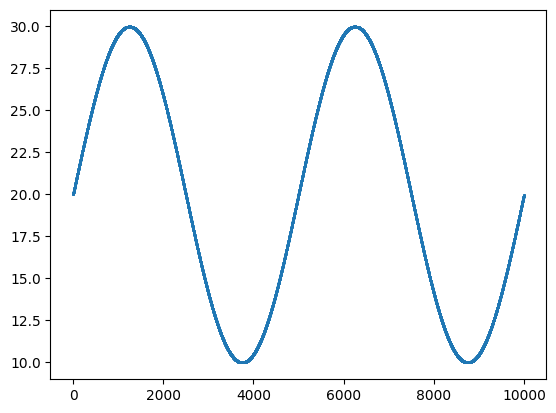

In [295]:
plt.scatter(indexes, raw_instances, s= 1)

In [296]:
errors = np.random.normal(0, np.sqrt(ERROR_VARIANCE), TOTAL_INSTANCES)
errors

array([ 1.30782214,  2.75303737,  1.83782486, ...,  4.92444989,
        0.1488607 , -1.71877615])

In [297]:
dataset = errors + raw_instances

In [298]:
import pandas as pd
dic = {
    'x': indexes,
    'y': dataset
}
df = pd.DataFrame(dic)


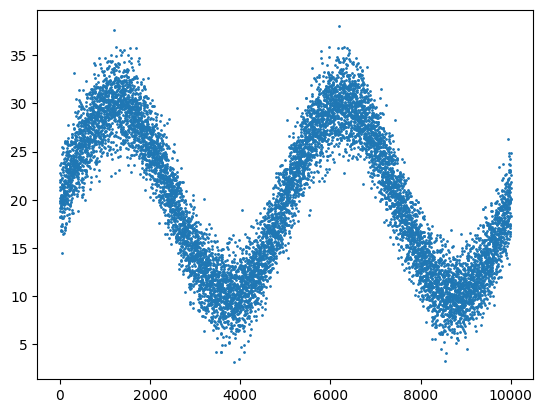

In [299]:
plt.scatter(indexes, dataset, s= 1)

# Sampling Datasets from Universal Dataset

In [300]:
import pandas as pd
import random

def get_samples(df, sample_size, num_samples):
    return [
        df.sample(sample_size)
        for _ in range(num_samples)
    ]

ALL_SAMPLES = get_samples(df, SAMPLE_SIZE, SAMPLES)
# ALL_SAMPLES


In [301]:
from typing import List, Dict

def fit_polynomials_to_samples(samples: List[Dict[str, List[float]]], lower_degree: int, upper_degree: int) -> List[List[List[float]]]:
    """
    Fit polynomials of varying degrees to each sample in the dataset.

    Parameters:
    samples (list of dict): A list of samples where each sample is a dictionary
                            with keys 'x' and 'y' representing the data points.
    lower_degree (int): The minimum degree of the polynomial to fit.
    upper_degree (int): The maximum degree of the polynomial to fit.

    Returns:
    list: A nested list where the structure is [degree][sample][coefficients].
    """
    all_models = []
    for degree in range(lower_degree, upper_degree + 1):
        degree_models = [
            np.polyfit(sample['x'], sample['y'], degree)
            for sample in samples
        ]
        all_models.append(degree_models)
    return all_models

ALL_MODELS = fit_polynomials_to_samples(ALL_SAMPLES, 1, MAX_DEGREE)
# ALL_MODELS


In [302]:
from typing import List

def predict_polynomial(x: List[float], coefficients: List[float]) -> List[float]:
    """
    Compute predictions for a polynomial given its coefficients and input values.

    Parameters:
    x (list of float): Input values for which predictions are required.
    coefficients (list of float): Coefficients of the polynomial, ordered from the highest degree to the constant term.

    Returns:
    list of float: Predicted values for each input in `x`.
    """
    return [
        sum(coeff * (x_term ** i) for i, coeff in enumerate(reversed(coefficients)))
        for x_term in x
    ]


# Cross Validation to Determine Validation and Training Error

In [303]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics
from typing import List, Tuple

def calculate_cv_errors(
    samples: List[dict], folds: int, lower_degree: int, upper_degree: int
) -> Tuple[List[List[List[float]]], List[List[List[float]]], List[List[List[float]]], List[List[List[float]]]]:
    """
    Perform cross-validation to compute train and validation errors for polynomial regression models.

    Parameters:
    samples (list of dict): List of samples, where each sample contains 'x' (features) and 'y' (targets).
    folds (int): Number of cross-validation folds.
    lower_degree (int): Lower bound of polynomial degree to fit.
    upper_degree (int): Upper bound of polynomial degree to fit.

    Returns:
    tuple: Contains train and validation errors (MAE, MSE) for each degree and fold:
        - validation MAE
        - validation MSE
        - training MAE
        - training MSE
    """
    val_mae_all_samples = []
    val_mse_all_samples = []
    train_mae_all_samples = []
    train_mse_all_samples = []

    for sample in samples:
        X, y = sample['x'], sample['y']

        val_mae_by_degree = []
        val_mse_by_degree = []
        train_mae_by_degree = []
        train_mse_by_degree = []

        kf = KFold(n_splits=folds, shuffle=True)

        for degree in range(lower_degree, upper_degree + 1):
            val_mae_per_fold = []
            val_mse_per_fold = []
            train_mae_per_fold = []
            train_mse_per_fold = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                # Fit polynomial model for the current degree
                coefficients = np.polyfit(X_train, y_train, degree)

                # Validation set predictions and error calculation
                y_pred_val = predict_polynomial(X_test, coefficients)
                val_mae_per_fold.append(metrics.mean_absolute_error(y_test, y_pred_val))
                val_mse_per_fold.append(metrics.mean_squared_error(y_test, y_pred_val))

                # Training set predictions and error calculation
                y_pred_train = predict_polynomial(X_train, coefficients)
                train_mae_per_fold.append(metrics.mean_absolute_error(y_train, y_pred_train))
                train_mse_per_fold.append(metrics.mean_squared_error(y_train, y_pred_train))

            val_mae_by_degree.append(val_mae_per_fold)
            val_mse_by_degree.append(val_mse_per_fold)
            train_mae_by_degree.append(train_mae_per_fold)
            train_mse_by_degree.append(train_mse_per_fold)

        val_mae_all_samples.append(val_mae_by_degree)
        val_mse_all_samples.append(val_mse_by_degree)
        train_mae_all_samples.append(train_mae_by_degree)
        train_mse_all_samples.append(train_mse_by_degree)

    return val_mae_all_samples, val_mse_all_samples, train_mae_all_samples, train_mse_all_samples


# Run the cross-validation error calculation
samples_val_mae, samples_val_mse, samples_train_mae, samples_train_mse = calculate_cv_errors(
    ALL_SAMPLES, FOLDS, 1, MAX_DEGREE
)


# Optimal Degree Model According to Validation Error

In [304]:
# find the average error for each degree across all the samples, then find the average for each degree
mean_val_mae = np.mean(np.mean(samples_val_mae, axis=0), axis = 1)
mean_val_mse = np.mean(np.mean(samples_val_mse, axis=0), axis = 1)
mean_train_mae = np.mean(np.mean(samples_train_mae, axis=0), axis = 1)
mean_train_mse = np.mean(np.mean(samples_train_mse, axis=0), axis = 1)
# Find the degree with the minimum mean absolute error
degree_with_min_mae = np.argmin(mean_val_mae) + 1
min_mae = np.min(mean_val_mae)

# Find the degree with the minimum mean squared error
degree_with_min_mse = np.argmin(mean_val_mse) + 1
min_mse = np.min(mean_val_mse)

# Print the results
print("Model of degree:", degree_with_min_mae, "with minimum mean absolute validation error as:", min_mae)
print("Model of degree:", degree_with_min_mse, "with minimum mean squared validation error as:", min_mse)

Model of degree: 9 with minimum mean absolute validation error as: 1.9754336292101637
Model of degree: 9 with minimum mean squared validation error as: 6.167179757807364


# Plot Train and Validation Errors

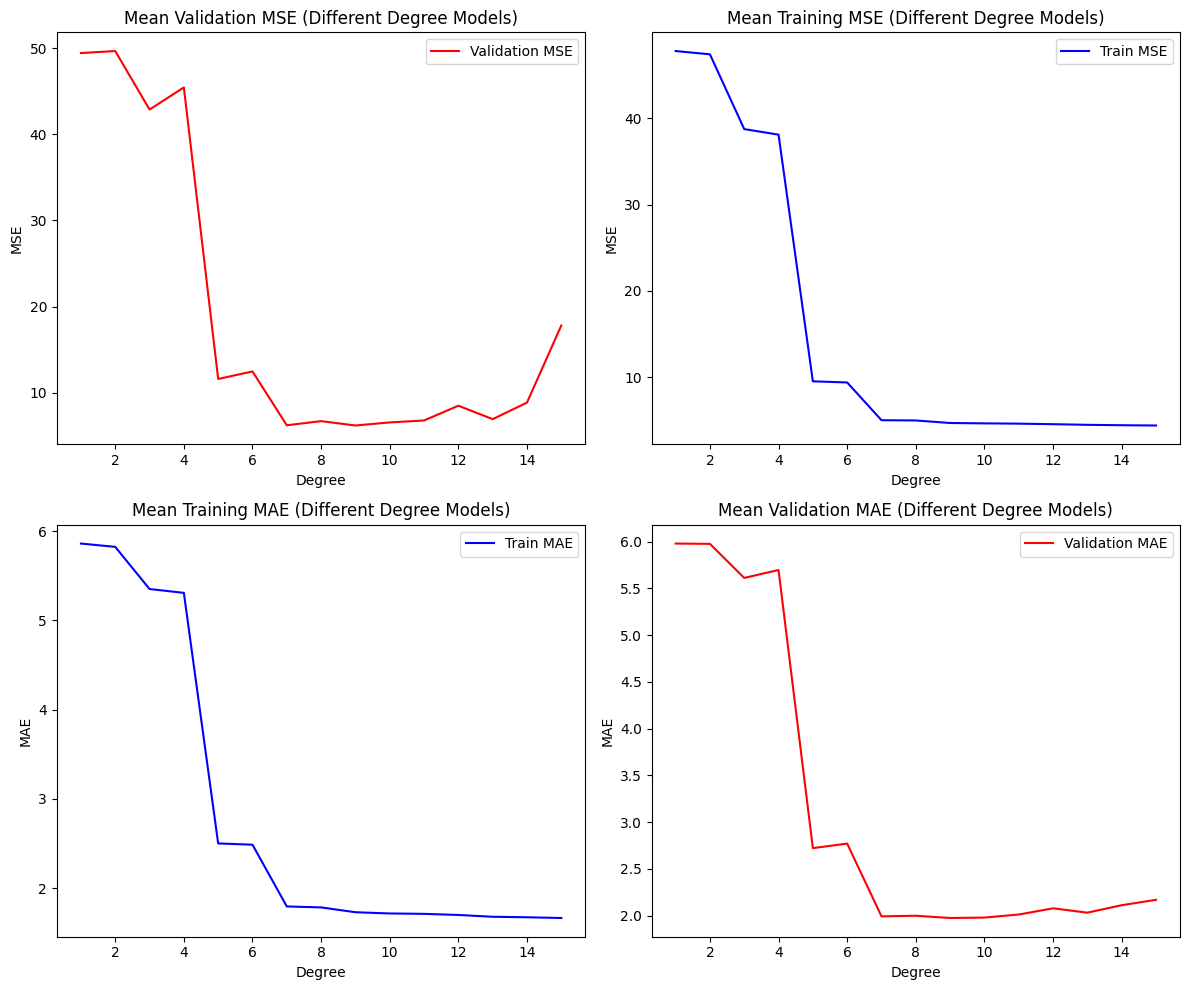

In [305]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Mean Validation MSE
axes[0, 0].plot(range(1, MAX_DEGREE + 1), mean_val_mse, label='Validation MSE', color='red')
axes[0, 0].set_xlabel('Degree')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('Mean Validation MSE (Different Degree Models)')
axes[0, 0].legend()

# Plot 2: Mean Training MSE
axes[0, 1].plot(range(1, MAX_DEGREE + 1), mean_train_mse, label='Train MSE', color='blue')
axes[0, 1].set_xlabel('Degree')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Mean Training MSE (Different Degree Models)')
axes[0, 1].legend()

# Plot 3: Mean Training MAE
axes[1, 0].plot(range(1, MAX_DEGREE + 1), mean_train_mae, label='Train MAE', color='blue')
axes[1, 0].set_xlabel('Degree')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Mean Training MAE (Different Degree Models)')
axes[1, 0].legend()

# Plot 4: Mean Validation MAE
axes[1, 1].plot(range(1, MAX_DEGREE + 1), mean_val_mae, label='Validation MAE', color='red')
axes[1, 1].set_xlabel('Degree')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].set_title('Mean Validation MAE (Different Degree Models)')
axes[1, 1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


# Find Bias Variance for Every Degree of Polynomial



In [306]:
def get_predictions_for_degree(X, models, degree=1):
    """
    Get predictions for all models fit on different samples for a specific degree polynomial.

    Parameters:
    X (array-like): Input data for which predictions are required.
    models (list): A nested list where models[degree_index][sample_index] contains the model for a specific degree and sample.
    degree_index (int, optional): Index of the degree polynomial for which predictions are required. Defaults to 1.

    Returns:
    list: A list of predictions for each sample for the given degree.
    """
    return [predict_polynomial(X, models[degree][sample]) for sample in range(SAMPLES)]


In [307]:
def compute_predictions(X, models):
    """
    Compute predictions for all polynomial degrees across all models and calculate their averages.

    Parameters:
    X (array-like): Input data for predictions.
    models (list of list): Nested list of models, where models[degree][sample] represents a model.

    Returns:
    tuple:
        - preds (list of list): Predictions for each degree and sample.
        - avg_preds (list): Average predictions across all samples for each degree.
    """
    preds = []
    avg_preds = []

    for degree, degree_models in enumerate(models):
        # Compute predictions for all samples for the current degree
        degree_preds = [predict_polynomial(X, model) for model in degree_models]
        preds.append(degree_preds)

        # Compute average predictions for the current degree
        avg_preds.append(np.mean(degree_preds, axis=0))

    return preds, avg_preds


# Compute predictions and their averages
preds_full, avg_preds_full = compute_predictions(indexes, ALL_MODELS)


In [308]:
def compute_bias_squared(X, avg_preds):
    """
    Compute the bias squared for all polynomial degrees based on the average predictions.

    Parameters:
    X (list or array-like): Indices of the input data points.
    avg_preds (list of array-like): Average predictions for each degree.

    Returns:
    list: Bias squared for each degree.
    """
    all_bias = []
    for degree_avg_pred in avg_preds:
        bias = 0
        for x in X:
            bias += (raw_instances[x] - degree_avg_pred[x]) ** 2
        bias /= len(X)
        all_bias.append(bias)
    return all_bias


# Compute bias squared for all degrees
bias_full = compute_bias_squared(indexes, avg_preds_full)
bias_full


[42.44143312403099,
 42.58533915076156,
 35.82444504329322,
 35.98017596261473,
 4.722477291085561,
 4.729996761899493,
 0.17176423089663664,
 0.18112439895464735,
 0.05529927411313505,
 0.046871044651454585,
 0.0523914381583881,
 0.08870484585958842,
 0.09924531328690013,
 0.2412354208834492,
 0.17558305725352308]

In [309]:
def compute_variance(X, all_preds, avg_preds):
    """
    Compute the variance for all polynomial degrees based on predictions and average predictions.

    Parameters:
    X (list or array-like): Indices of the input data points.
    all_preds (list of list of array-like): Predictions for each degree and sample.
    avg_preds (list of array-like): Average predictions for each degree.

    Returns:
    np.ndarray: Variance for each degree.
    """
    all_variance = []
    for degree in range(len(all_preds)):
        variance = 0
        for sample in range(SAMPLES):
            for j in range(len(X)):
                variance += (all_preds[degree][sample][j] - avg_preds[degree][j]) ** 2
        variance /= (len(X) * SAMPLES)
        all_variance.append(variance)

    return np.array(all_variance)


# Compute variance for all degrees
variance_full = compute_variance(indexes, preds_full, avg_preds_full)
variance_full


array([0.43537962, 0.63068864, 1.08557833, 1.58199029, 0.5240465 ,
       0.73849842, 0.42164403, 0.48033473, 0.51801466, 0.55566817,
       0.60598296, 0.71522293, 1.43271277, 1.56145315, 1.90114534])

In [310]:
total_error = bias_full + variance_full
total_error

array([42.87681274, 43.21602779, 36.91002337, 37.56216625,  5.24652379,
        5.46849518,  0.59340826,  0.66145913,  0.57331394,  0.60253921,
        0.65837439,  0.80392778,  1.53195809,  1.80268857,  2.0767284 ])

# Bias Variance Plot for Different Degrees


*   We can observe that as the model complexity/degree of polynomial increases the variances rises and bias decrease.
*   The total error first decreases, reaches a minima and then increases due to increase in variance.
* This is known as the bias variance tradeoff.








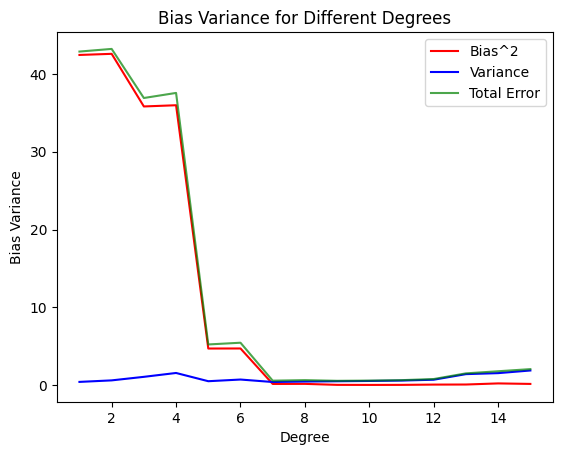

In [311]:
plt.xlabel('Degree')
plt.ylabel('Bias Variance')
plt.title('Bias Variance for Different Degrees')
plt.plot(range(1,MAX_DEGREE + 1), bias_full, label='Bias^2', color='red')
plt.plot(range(1,MAX_DEGREE + 1), variance_full, label='Variance', color='blue')
plt.plot(range(1,MAX_DEGREE + 1), total_error, label='Total Error',color ='green', alpha=0.7)
plt.legend()

## Log Bias Variance Plot For Better Visualization

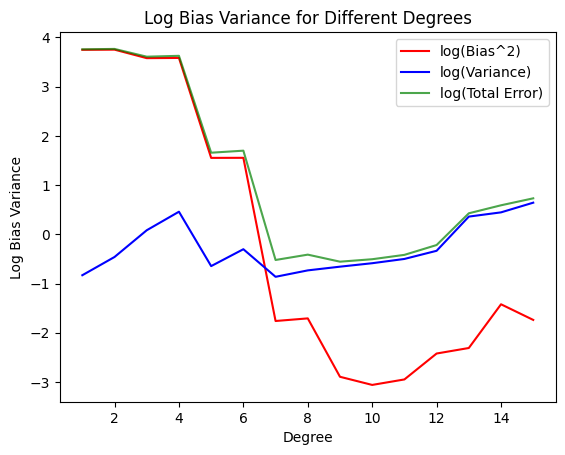

In [312]:
from math import log
plt.xlabel('Degree')
plt.ylabel('Log Bias Variance')
plt.title('Log Bias Variance for Different Degrees')
plt.plot(range(1,MAX_DEGREE + 1), [log(b) for b in bias_full], label='log(Bias^2)', color='red')
plt.plot(range(1,MAX_DEGREE + 1), [log(v) for v in variance_full], label='log(Variance)', color='blue')
plt.plot(range(1,MAX_DEGREE + 1), [log(e) for e in total_error], label='log(Total Error)',color ='green', alpha=0.7)
plt.legend()

In [313]:
optimal_degree = np.argmin(total_error) + 1
print(" Model of degree : ", optimal_degree, " with total error as : ",total_error[optimal_degree - 1])

 Model of degree :  9  with total error as :  0.5733139364538823


# Plotting of all the polynomial fits on different samples

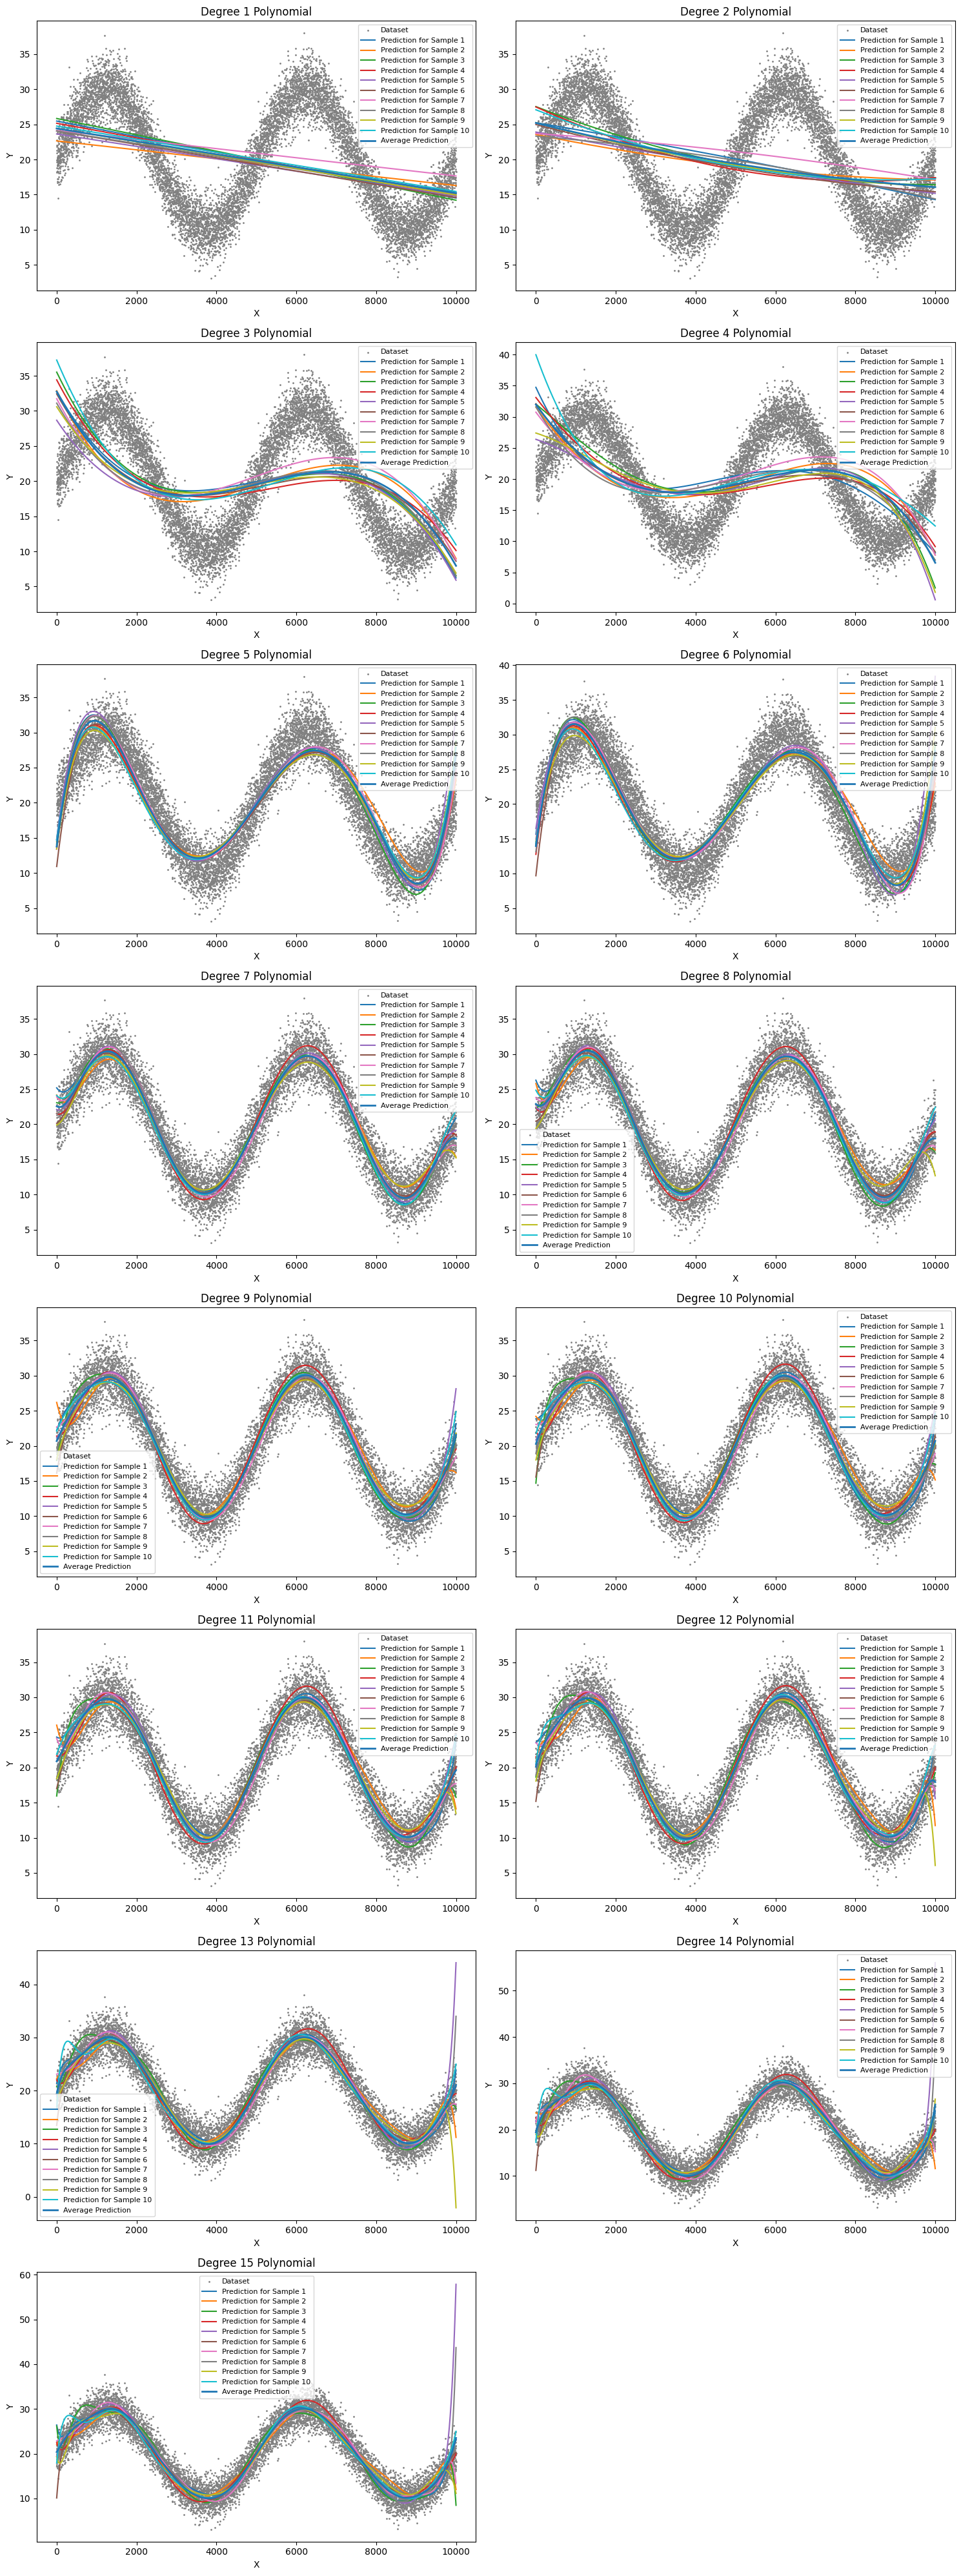

In [314]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw predictions for a specific degree
def draw_preds_for_model(ax, degree, preds, indexes, dataset):
    ax.scatter(indexes, dataset, s=1, label='Dataset', color="gray")
    for i in range(SAMPLES):
        ax.plot(indexes, preds[i], label=f'Prediction for Sample {i + 1}')
    ax.plot(indexes, np.mean(preds, axis=0), label='Average Prediction', linewidth=2)
    ax.set_title(f'Degree {degree} Polynomial', fontsize=12)
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)
    ax.legend(fontsize=8)

# Grid layout parameters
rows = (MAX_DEGREE + 1) // 2  # 2 plots per row
cols = 2

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten axes for easier indexing

# Loop through each degree and plot
for i in range(MAX_DEGREE):
    draw_preds_for_model(axes[i], i + 1, preds_full[i], indexes, dataset)

# Hide unused subplots (if MAX_DEGREE is odd)
for j in range(MAX_DEGREE, len(axes)):
    axes[j].axis('off')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/content/all_degrees.png')
plt.show()


# TODO: Showcase bias variance tradeoff for different sample sizes.